# The battle over statistics

As you know well as this point, there are really two competing schools of statistical inference, the frequentist that focuses on p-values, hypothesis testing, and statistical significance vs the Bayesian that focuses on posterior distributions. The fact there are two schools of statistics is surprising given that statistics, on first glance, looks like a purely mathematical subject matter. We have a pretty good idea of what numbers each group likes to calculate. But now we can turn to what drives the debate. 

## Clearing up the business about the swans.

Earlier, we noted that confirmation is philosophically puzzling. It makes intuitive sense for us to grow more confident in a hypothesis after we find evidence that supports it.

$$ H \supset O $$
$$ O $$
$$ \therefore O \,\, confirms \,\, H $$

But, logically speaking, this argument is invalid. Popper took this problem very seriously and denied that induction is possible. He sought to build a deduction-only science. It's okay, as it stands. But still a bit counter intuitive - on Popper's view, this intuitive line of reasoning doesn't work at all. Despite the rigor of Popper's argument, the intuition doesn't go away. When I see a white swan, I think that supports my hypothesis all swans are white.

All semester I've been promising you I would explain this philosophical puzzle. We had to wait until Bayesian inference to get a good grasp on it. Bayesian inference demonstrates that the above argument is good but only if we make extra assumptions about how many alternative ways there are to generate the evidence. When, exactly, does observing O confirm H? Whenever P(O|H) is more likely than P(O). Or, whenever H is better at predicting O than the average hypothesis.

Let me put that a bit more concretely. If my hypothesis says "all swans are white", it means that P(white swan|H) = 1. Now we can imagine a range of alternative hypotheses - "90% of swans are white," "more than half of swans are white," or "no swans are white." When I see a white swan, I can compute the likelihood of that observation given all four hypotheses and run the results through Bayes theorem. In this case, the hypothesis 'all swans are white' will confer a higher likelihood on the evidence than any alternative. No matter what P(H) is, it will go up.

So, more formally, E confirms H if and only if:

$$P(H|E) > P(H)$$

What really matters in the inference is whether the ratio of the likelihood to the expectation is greater or less than one. Let's do a quick proof. We can substitute Bayes rule in for $P(H|E)$ in the above inequality.

$$ P(H)\frac{P(E|H)}{P(E)} > P(H) $$

Divide each side by $P(H)$.

$$ \frac{P(H)}{P(H)} \frac{P(E|H)}{P(E)} > \frac{P(H)}{P(H)} $$

Simplify.

$$ \frac{P(E|H)}{P(E)} > 1 $$

Recall that $P(E)$ can be substituted for the average likelihood, using the law of total probability. So informally speaking, whenever a hypothesis does better at predicting the evidence than the average hypothesis, the evidence confirms that hypothesis. 

One feature of this approach to inference that is really nice is that it identifies a logical symmetry between confirmation and refutation. Popper argued that refutation is easy but confirmation is an illusion. With this framework, we can see that artificial. Suppose $H$ strictly entailed $E$ but we discovered $~E$ instead. Than the $P(~E|H)$ is 0 and the ratio is less than 1. $E$ *disconfirms* $H$. More generally, if the hypothesis performs worse than the average hypothesis, the evidence is disconfirmatory.

## Did we just solve the problem of induction?

No. We just moved it around. This is still a kind of deductive inference. Probability theory is a type of mathematics and Bayes theorem is a theorem - it is deduced from the axioms of probability. Once we know the prior, the likelihood, and the expectation, we can deduce the posterior. It's still all deduction.

Like Popper, we are trying to circumvent the problem of induction. We use deductive inferences to do what we thought induction does. I think the best position on the problem of induction is this -- *induction is either deduction in disguise or it's invalid*. Bayesian inference helps us unmask the disguise.

One reason why it doesn't solve the problem of induction is that we have to make new assumptions about the prior distribution. The prior tells us both the range of relevant alternative hypotheses and also how strong each one is. If we leave out the true answer from the prior distribution, we can never learn the truth.

## Is Bayesian inference subjective?

We've just seen some of the main benefits of Bayesian inference. But critics worry that all these extra assumptions we introduced defeat the objectivity of science. The central worry concerns the prior distribution. You can set it however you want. What stops you from setting in a way that biases the inference to get the answer you want? Especially in very complex analyses, it can often be hard to keep track of how much influence the priors really have. So it's a realistic possibility that scientists can stack the deck, so to speak, to get the results they want. Isn't this just p-hacking by another name?

It's just my opinion but I don't think it's so bad. **First**, if you don't have any reason to set your priors one way or another, you can always just set flat priors. It's a conservative choice and it means your evidence is doing all the work in the analysis. 

In fact, a little algebra can show that flat priors are basically no priors are at all. Suppose we have just two hypotheses. Bayes theorem looks like:

$$ P(H_1|E) = P(H_1) \frac{P(E|H_1)}{P(H_1)P(E|H_1) + P(H_2)P(E|H_2)} $$

If priors are flat then $P(H_1) = P(H_2)$. But if that's true, denominator can be factored.

$$ P(H_1|E) = P(H_1) \frac{P(E|H_1)}{P(H_1)(P(E|H_1) + P(E|H_2))} $$

But now we can move this around to cancel out the priors.

$$ P(H_1|E) = \frac{P(H_1)}{P(H_1)} \frac{P(E|H_1)}{P(E|H_1) + P(E|H_2)} $$

$$ P(H_1|E) = \frac{P(E|H_1)}{P(E|H_1) + P(E|H_2)} $$

All that's left is a ratio of likelihoods. The conclusion is that the if you only trust your likelihood functions to be objective, then set the most modest priors you can.

**Second**, if you *do* have some reason to think some hypotheses are more realistic than other, you should definitely not ignore that information! Thinking about physical constraints on your problem can supply more realistic priors that help the inference converge on the truth, even in sparse datasets. We saw this with the globe tossing problem - we wouldn't be alive if the earth was too much water or not enough. So is the Popperian approach really more objective if it ignores free information?

## Likelihood functions are subjective, also

A central moral to this course is that models are funky. Likelihood functions or $P(E|H)$ are models. Models are well-structured assumptions. But they remain assumptions. Some models employ idealizations. Other use certain convenient simplifications of really hard math problems. Often, we just have no idea what's reasonable to assume. But unless we select the right likelihood functions, bayesian inference can't discover the truth. So before we even get to analyzing data, we have choices to make with a certain subjective element.

The kind subjectivity is a bit different. For any given likelihood function, there is one and only one probability to assign to the data. So that stays objective in a certain sense. But you still have to pick the right likelihood function(s) in the first place. If you don't, Bayesian inference will never find the truth.

Finding likelihood functions for simple problems like tea tasting isn't even straightforward. As you have already explored, there is a large family of models that might plausibly describe how Lady Bristol moves through her experiment. What makes one the uniquely best model? Nothing. We just slowly piece together bits of knowledge with bits of intuition and that's how we build models. This is a kind of subjectivity that Popperians and Bayesians share. It's inescapable.

# A zoo of probability distributions

Now that we have some philosophical thinking about priors, it would be helpful to have some helpful tools for constructing priors. There are two sorts of thinks we need to think about when setting a prior.

1. The range. A prior needs to cover the right range of possibilities. Some parameters are tightly bound. Like accuracy parameters - they are bound between 0 and 1. But other parameters are unbounded. Like elevation. In principle, a mountain could be as tall as it wants or a valley can be as low as it wants. So if we want to estimate the elevation of something, we need a prior that can range over parameters postive or negative.

2. The shape. A prior needs to be able to make some parameters more plausible then others. So we need to be able to easily adjust how much weight is given to certain regions of the parameter. 

I'm going to show you 3 different distributions that are handy for setting priors in nearly all cases. Each one is designated by the range it spans. Within that range, the parameters of the distribution help you control the shape.

## For parameters bound between 0 and 1

Here is the beta distribution. Notice it starts and stops at 0 and 1. Play around with the a and b parameters for a while to get a sense for its shape. What happens as $a$ goes up? What happens as $b$ goes up?

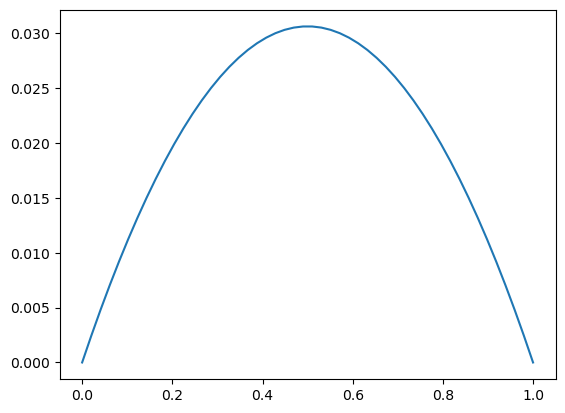

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

grid = np.linspace(0,1)
prior = stats.beta(a=2,b=2).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

### The Gallary of Betas

You can get a sense for the different shapes below. The key less is, if you want a very flat beta distribution, a=1, b=1 is a good bet. Otherwise, if you want some skew one direction or the other, bumping up the numbers and making them asymmetrical would help.

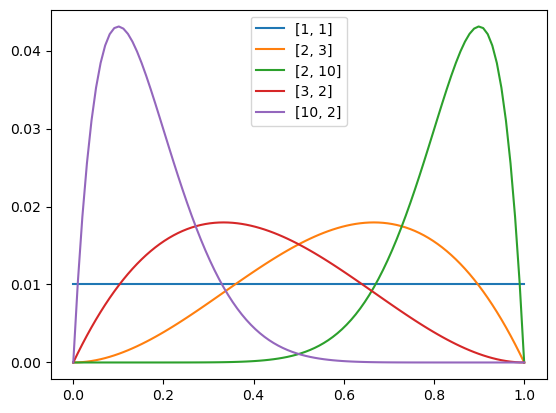

In [40]:
beta_params = [[1,1],[2,3],[2,10],[3,2],[10,2]]

for b in beta_params:

    grid = np.linspace(0,1,100)
    prior = stats.beta(b[1],b[0]).pdf(grid)
    prior = prior / sum(prior)

    plt.plot(grid,prior,label=str(b))
    plt.legend()

### One weird beta

Beta distributions can also be flipped upside down into a U shape. If you set $a$ and $b$ to be less than 1, you get the flip. But it's buggy. Notice this error.

C:\Users\dsaun\AppData\Local\Temp\ipykernel_1840\1772275778.py:3: RuntimeWarning: invalid value encountered in true_divide
  prior = prior / sum(prior)


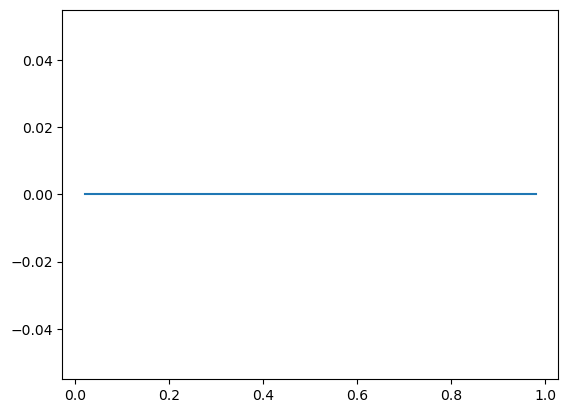

In [11]:
grid = np.linspace(0,1)
prior = stats.beta(0.5,0.5).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

The division error shows up because the start and end of the distribution are both infinity. This arises due to the way `.pdf` functions have to approximate things.

In [30]:
prior

array([       inf, 2.25125966, 1.60872674, 1.32772051, 1.16254549,
       1.05156196, 0.97103829, 0.90964627, 0.86121044, 0.8220438 ,
       0.78979413, 0.76288323, 0.74020962, 0.72098011, 0.70460897,
       0.69065493, 0.67878033, 0.66872377, 0.66028147, 0.65329417,
       0.64763783, 0.64321704, 0.63996023, 0.6378163 , 0.63675239,
       0.63675239, 0.6378163 , 0.63996023, 0.64321704, 0.64763783,
       0.65329417, 0.66028147, 0.66872377, 0.67878033, 0.69065493,
       0.70460897, 0.72098011, 0.74020962, 0.76288323, 0.78979413,
       0.8220438 , 0.86121044, 0.90964627, 0.97103829, 1.05156196,
       1.16254549, 1.32772051, 1.60872674, 2.25125966,        inf])

The easiest solution is to just slice off 0 and 1 from the distribution. Notice the grid below.

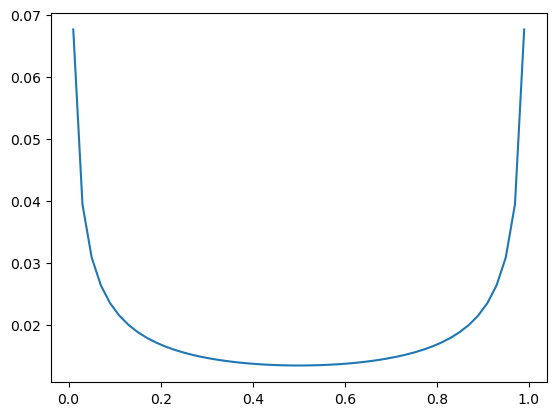

In [12]:
grid = np.linspace(0.01,0.99) # grid change.
prior = stats.beta(0.5,0.5).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

## For parameters that must be positive

- Add the gamma distribution

Sometimes all you know about a parameter is that it must be zero or bigger. For example, the hot hands parameter cannot be negative. It's a feature of our model that you perform better when you get them right. So to reflect that, we need positive valued parameters. 

Furthermore, we should also think that the hot hands factor is never super big. If your performance goes up by 0.5 every time you get a cup right, that is pretty implausible. It's a huge jump. It seems like small hot hands factors are the most likely. So we want a distribution that gently slows downward. The exponential is our friend here.

`stats.expon(loc=0,scale=50).pdf(grid)`

It has a starting place `loc=`. We normally assume 0 but technically you can start it wherever you like. The scale determines how streeply it declines. Because we want only a modest penalty to big hot hands factors, we can set this really high. It makes the slope more gentle.

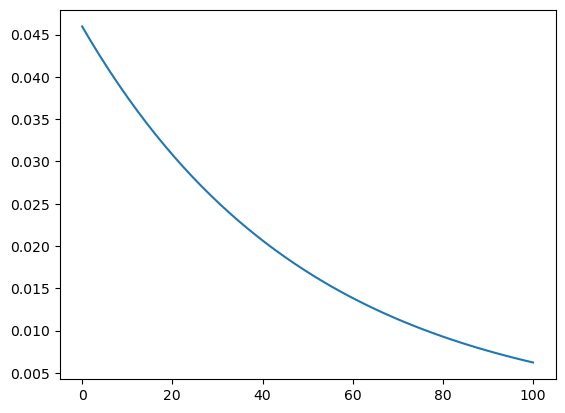

In [26]:
grid = np.linspace(0,100)
prior = stats.expon(loc=0,scale=50).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

### The gallery of exponentials

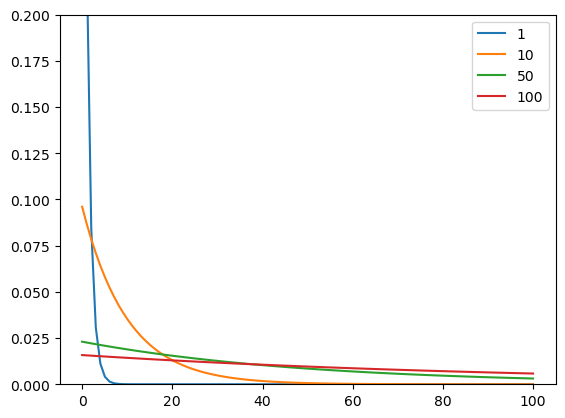

In [50]:
scales = [1,10,50,100]

for scale in scales:
    grid = np.linspace(0,100,100)
    prior = stats.expon(loc=0,scale=scale).pdf(grid)
    prior = prior / sum(prior)

    plt.plot(grid,prior,label=str(scale))
    plt.ylim([0,0.2])
    plt.legend()

## For parameters that can be positive or negative

The normal distribution goes in both directions endlessly. You control the center with `loc=` and the spread with `scale=`. They are great when you want to say a certain region of parameters is pretty plausible and then everything around that region has decreasing plausibility.

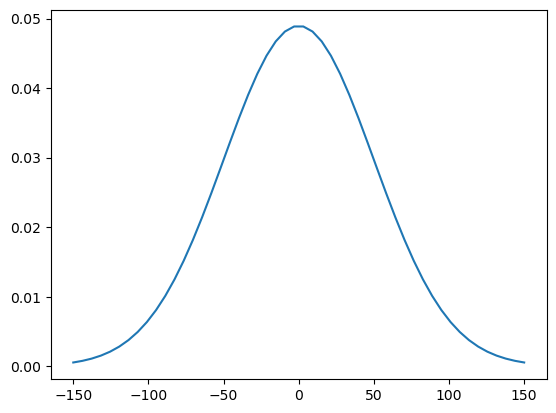

In [14]:
grid = np.linspace(-150,150,100)
prior = stats.norm(loc=0,scale=50).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

### Gallery of normals

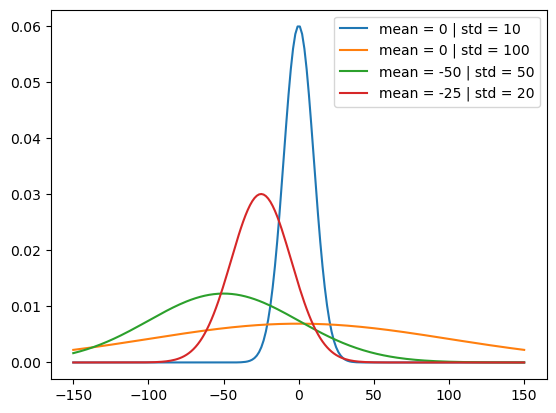

In [57]:
params = [[0,10],[0,100],[-50,50],[-25,20]]

for param in params:
    grid = np.linspace(-150,150,200)
    prior = stats.norm(loc=param[0],scale=param[1]).pdf(grid)
    prior = prior / sum(prior)

    plt.plot(grid,prior,label="mean = " + str(param[0]) + " | std = " + str(param[1]))
    plt.legend()

## For anything else

- Cut this section

Finally, there a lot of cases where the prior doesn't nicely fit with any standard named distribution. *Beta*, *Exponential*, and *Normal* cover a wide range of cases. But they don't cover everything. Sometimes you need a weird shape. For example, what if you want a large band of parameters to all be equally likely. The normal distribution has a peak, like a mountain. But you want a plateau. Well, you can combine distributions. Like this:

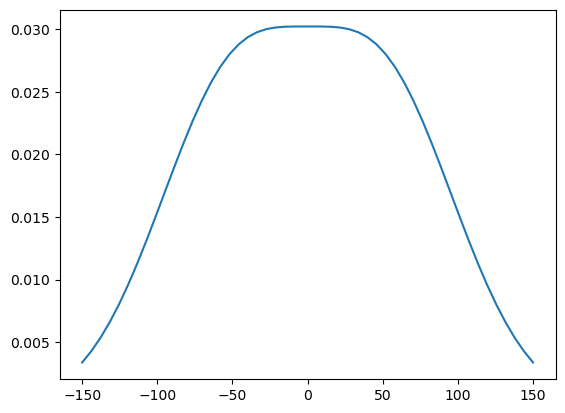

In [17]:
grid = np.linspace(-150,150,100)
prior1 = stats.norm(loc=50,scale=50).pdf(grid)
prior2 = stats.norm(loc=-50,scale=50).pdf(grid)
prior = prior1 + prior2
prior = prior / sum(prior)

plt.plot(grid,prior)

Or maybe you want two peaks, somewhat asymmetrically.

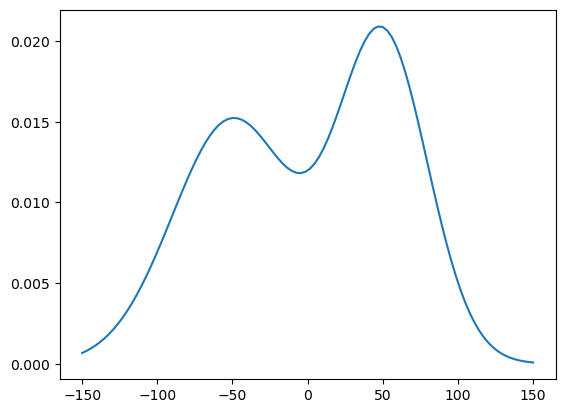

In [61]:
grid = np.linspace(-150,150,100)
prior1 = stats.norm(loc=50,scale=30).pdf(grid)
prior2 = stats.norm(loc=-50,scale=40).pdf(grid)
prior = prior1 + prior2
prior = prior / sum(prior)

plt.plot(grid,prior)

You'll see one more way to combine distributions below.

# Case study - Priors for the hot hands model

## Three principles for setting good priors

With all that in mind, it would be good if we had some guidelines to help us set good priors. I think if you remember three and half principles you'll rarely go wrong.

- 1. Include what you know.
- 2. Maximize uncertainty over what you do not.
- 3. Don't double count your data.

Include what you know means incorporate logic, intuition and background evidence if you have it. Neglecting to use those tools is irresponsible. You can almost always make smart inferences about the plausible range of parameter values just by stopping and thinking.

Maximize uncertainty what you do know means, don't overstate your case. If the arguments in #1 are not terribly conclusive, set modest or flatter priors.

Finally, #3 means you cannot use your data to tell you where to set your prior. Your prior is *prior* to the data. It's everything you think, except the data at hand. Sometimes students, unsure how to set a prior, will tune it to the match the data as much as possible. This is illegal. Bayesian theorem the only valid way to adjust your prior in light of the data. If you use the data to tune the prior, it's like counting you data twice. Once to tune the prior and once to perform the update. But you can't double your sample size just by wishing you had more data.

Let's apply this reasoning to our hot hands model. Update our code.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simulate_hh_bristol(a,n,h):
    '''Returns a list of 0s and 1s of lengeth n
    with 0 indicating failure and 1 indicating success.
    
    a = accuracy on each cup
    n = the number of cups
    h = the increment by which she gets better or worse'''

    experiment = []
    a_series = []

    for i in range(n):
        
        outcome = np.random.choice([1,0],p=[a,1-a])
        experiment.append(outcome)
        a_series.append(a)

        if outcome == 1:
          a = a + h
        else:
          a = a - h

        # check for ceiling
        # / floor problems

        if a < 0:
          a = 0
        if a > 1:
          a = 1
        
        # print(a)
        
    return experiment, a_series

def run_hh_experiments(a,n,precision,h):
    '''Returns a list containing the number of cups lady bristol
    guessed correctly over many experiments
    
    a = accuracy on each cup
    n = number of cups per experiment
    precision = the number of experiments
    h = the increment by which she gets better and worse'''
    
    
    all_trials = []

    for i in range(precision):
      
        results, a_series = simulate_hh_bristol(a,n,h)
        correct = sum(results)
        all_trials.append(correct)

    return all_trials

def likelihood_hh(a,h,n,k,precision):
    '''
    Compute the likelihood of getting k successes out of n
    trials assuming probability of success a on each trial.

    a = accuracy
    h = the increment by which she gets better and worse
    n = total number of trials
    k = the number of successes
    precision = the number of simulated experiments used to estimate
    the likelihood'''

    all_trials = run_hh_experiments(a,n,precision,h)
    matches = all_trials.count(k)
    prob = matches / precision

    return prob

We'll consider each parameter in turn.

## Hot hands parameter

The hot hands parameter `h` is the most fun. What are plausible values for `h`? 

Well, let's start by thinking about implausible values. If Lady Bristol improved by 0.75 every time she got one right, we should almost always exceed the ceiling. If her initial accuracy is around 0.5 and she gets the first one right, her accuracy shoots up to 1. If she gets the first one wrong, it shoots to zero. That's a really extreme assumption.

To handle extremely high parametes for `h`, we'll do two things. First we'll define the grid so her max value is 0.5. That cuts out a bunch of extreme values. 

In [ ]:
h_grid = np.linspace(0,0.5,20)

Second, we'll steadily discount high values of `h` with an exponential distribution.

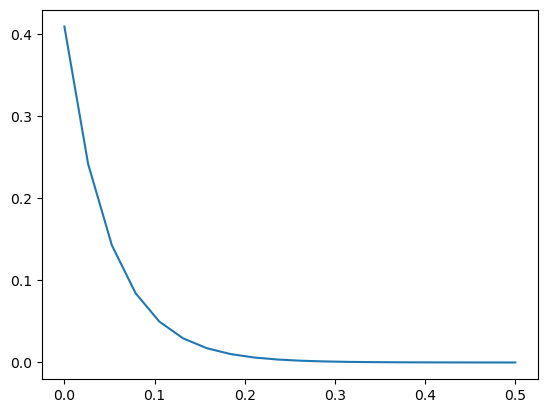

In [4]:
h_grid = np.linspace(0,0.5,20)

h_prior = stats.expon(loc=0,scale=0.05).pdf(h_grid)
h_prior = h_prior / sum(h_prior)

plt.plot(h_grid,h_prior)

How should we tune the exponential distribution? This is an matter of judgment so feel free to disagree with my choices. But my reasoning is like this: a hot hands factor of 0.2 isn't impossible but it's still pretty big. That means if she gets 2 right in a row and she started at 0.5 accuracy, she's nearly perfect. I don't think confidence can make *that* big of a difference. Just a little difference. So I want the distribution to start approaching zero around 0.2. Finally, I do think loads of small `h` factors are the most plausible. So I want the distribution to peak around 0 and assign a good chunk of probability between 0 and 0.1.

When it comes to the assignment, the challenge is to make your reasoning clear, not perfect. If you have reasons for each thing you do and those reasons are plausible, you'll get full marks. But if you make choices that are unexplained or the explanation is only vaguely connected to the mathematical representation, partial marks are in order.

What does the update look like? I apply the grid approximation algorithm and plot the prior beside the posterior.

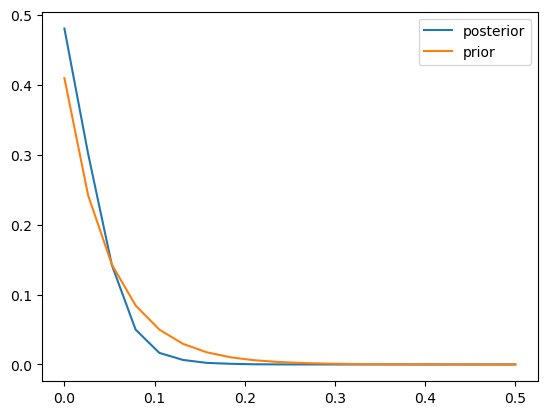

In [5]:
a = 0.5
n = 12
k = 8
precision = 10000

likelihoods = [likelihood_hh(a,h,n,k,precision) for h in h_grid]

likelihoods = np.array(likelihoods)
    
unnormalized_posts = likelihoods * h_prior
    
posterior = unnormalized_posts / sum(unnormalized_posts)

plt.plot(h_grid,posterior,label="posterior")
plt.plot(h_grid,h_prior,label="prior")
plt.legend()

According to your data, actually even smaller `h` factors are most plausible. The posterior shifts toward zero. So if the hot hands factor is relevant, it is probably not too big.

## Accuracy priors

- accurary prior should be beta(4,1)

After class one day, a student and I were discussing the Lady Tasting tea problem. They pointed out that it's actually really weird if her accuracy levels drop below 0.5. 0.5 is just guessing at random. If she has no confidence and no skill, she shouldn't *really* perform worse than guessing at random. 

I think that's a pretty good insight. But maybe it's possible to be so flustered that you engage in a bit of self-sabotage, consistently guessing the wrong direction. 

I want to build a prior that assigns accuracy levels above 0.5 to have higher probability than accuracy levels below 0.5. I don't want the jump to be *too* big because it's still possible lady bristol performs really bad. 

The approach I'll take here is to have two flat priors glued together. Except one prior starts out lower than the other. So I can have two grids and two priors. But I `np.concatenate()` them together.

0.9999999999999989

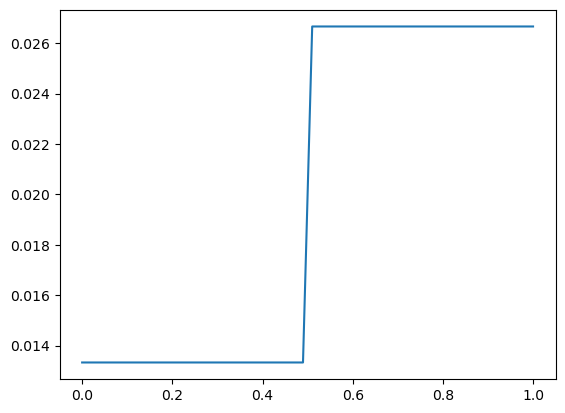

In [16]:
a_grid = np.linspace(0,1,50)

a_grid_1 = np.linspace(0,0.5,25)
a_grid_2 = np.linspace(0.5,1,25)

prior_1 = np.ones(25) / 50
prior_2 = np.ones(25) / 25

prior = np.concatenate((prior_1,prior_2))
prior = prior / sum(prior)
plt.plot(a_grid,prior)
sum(prior)

Here is what the update looks like:

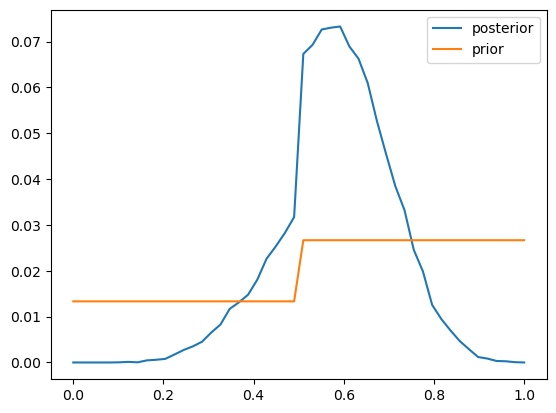

In [15]:
n = 12
h = 0.05
k = 8
precision = 10000

likelihoods = [likelihood_hh(a,h,n,k,precision) for a in a_grid]
    
likelihoods = np.array(likelihoods)
    
unnormalized_posts = likelihoods * prior
    
posterior = unnormalized_posts / sum(unnormalized_posts)

plt.plot(a_grid,posterior,label="posterior")
plt.plot(a_grid,prior,label="prior")
plt.legend()